<a href="https://colab.research.google.com/github/Nitesh-Kumar-074/NetwrokIntrusionDetectionSystem/blob/main/NIDS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
saved_dict = {}

In [ ]:
# df_chunks = pd.read_csv('UNSW-NB15_4.csv',chunksize=10000)
# dataset = pd.concat(df_chunks,ignore_index=True)
dfs = []
for i in range(1,5):
    path = '/content/drive/MyDrive/UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
all_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df

<ipython-input-4-9ae2605f0da7>:6: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))
<ipython-input-4-9ae2605f0da7>:6: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))


In [ ]:
all_data.shape

(2540047, 49)

In [ ]:
df_col = pd.read_csv('/content/drive/MyDrive/NUSW-NB15_features.csv',encoding='ISO-8859-1')

In [ ]:
df_col['Name'] = df_col['Name'].apply(lambda x : x.strip().replace(' ','').lower())

In [ ]:
all_data.columns = df_col['Name']

In [ ]:
# Saving useful info, later this will be used to transform raw test data
saved_dict['columns'] = df_col['Name'][df_col['Name']!='label'].tolist()

<Axes: xlabel='label', ylabel='count'>

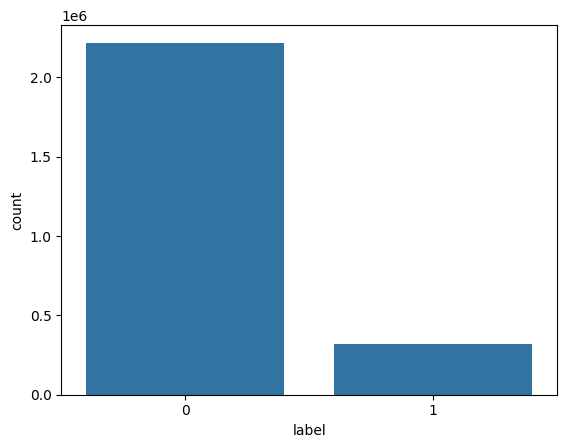

In [ ]:
sns.countplot(all_data,x='label')

In [ ]:
all_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [ ]:
del df_col

In [ ]:
train,test = train_test_split(all_data,test_size=0.3,random_state=16)

In [ ]:
print("Shapes of train and test data")
print(train.shape,'\n',test.shape)

Shapes of train and test data
(1778032, 49) 
 (762015, 49)


In [ ]:
print("Checking for null values in train data")
print(train.isnull().sum())

Checking for null values in train data
Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackd

In [ ]:
print("Checking types of values exist under attack_cat before modification.")
print(train['attack_cat'].value_counts())

Checking types of values exist under attack_cat before modification.
attack_cat
Generic             150906
Exploits             31507
 Fuzzers             13345
DoS                  11433
 Reconnaissance       8544
 Fuzzers              3569
Analysis              1855
Backdoor              1242
Reconnaissance        1220
 Shellcode             904
Backdoors              374
Shellcode              151
Worms                  120
Name: count, dtype: int64


In [ ]:
train['attack_cat'] = train.attack_cat.fillna(value='normal').apply(lambda x : x.strip().lower())
print("\nChecking types of values exist under attack_cat after modification.")
print(train['attack_cat'].value_counts())


Checking types of values exist under attack_cat after modification.
attack_cat
normal            1552862
generic            150906
exploits            31507
fuzzers             16914
dos                 11433
reconnaissance       9764
analysis             1855
backdoor             1242
shellcode            1055
backdoors             374
worms                 120
Name: count, dtype: int64


In [ ]:
train['ct_flw_http_mthd'] = train.ct_flw_http_mthd.fillna(value=0)

In [ ]:
print("Values in is_ftp_login")
print(train['is_ftp_login'].value_counts())
train['is_ftp_login'] = (train.is_ftp_login.fillna(value=0)).astype(int)

Values in is_ftp_login
is_ftp_login
0.0    746536
1.0     30329
4.0       109
2.0        21
Name: count, dtype: int64


In [ ]:
print(train.isnull().sum().sum())

0


There are no null values left in train data

In [ ]:
print(test.isnull().sum().sum())

1499013


Test data is still raw

In [ ]:
train_0,train_1 = (train['label'].value_counts()[0]/len(train.index),train['label'].value_counts()[1]/len(train.index))
test_0,test_1 = (test['label'].value_counts()[0]/len(test.index),test['label'].value_counts()[1]/len(test.index))

In [ ]:
print("In training data : there are {} % of class 0 and {} % of class 1 ".format(train_0*100,train_1*100))
print("In testing data : there are {} % of class 0 and {} % of class 1 ".format(test_0*100,test_1*100))

In training data : there are 87.33599845222133 % of class 0 and 12.664001547778666 % of class 1 
In testing data : there are 87.38699369434984 % of class 0 and 12.613006305650151 % of class 1 


We can clearly observe that there are so many non-attack as compared to attack.

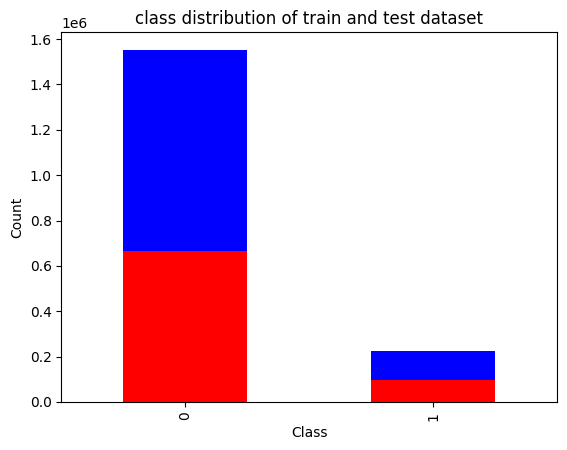

In [ ]:
plt.figure()
plt.title("class distribution of train and test dataset")
train['label'].value_counts().plot(kind='bar',color='b',label = "train")
test['label'].value_counts().plot(kind='bar',color='red',label="test")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
print("All the data types in train")
print(train.dtypes.value_counts())

All the data types in train
int64      29
float64    11
object      9
Name: count, dtype: int64


In [ ]:
print("Categorical fetures are")
print(train.select_dtypes(exclude=np.number).columns)

Categorical fetures are
Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object', name='Name')


ct_ftp_cmd is a numerical feature not a categorical feature

In [ ]:
print(train["ct_ftp_cmd"].unique())

[0 ' ' 1 '1' '0' 5 2 3 4 '4' 6 '2' 8]


In [ ]:
train['ct_ftp_cmd'] = train['ct_ftp_cmd'].replace(to_replace=' ',value=0).astype(int)
print(train['ct_ftp_cmd'].unique())

[0 1 5 2 3 4 6 8]


In [ ]:
print("Now Categorical fetures are")
print(train.select_dtypes(exclude=np.number).columns)

Now Categorical fetures are
Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'attack_cat'],
      dtype='object', name='Name')


In [ ]:
print("Numerical features are ")
print(train.select_dtypes(include=np.number).columns)

Numerical features are 
Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object', name='Name')


In NUSW-NB15_features.csv, it is mentioned that 'is_sm_ips_ports' and 'is_ftp_login' are binary features.

In [ ]:
# Info for test data transformation
saved_dict['binary_col'] = ['is_sm_ips_ports', 'is_ftp_login']

In [ ]:
for col in 'is_sm_ips_ports','is_ftp_login':
    print(train[col].value_counts())

is_sm_ips_ports
0    1775116
1       2916
Name: count, dtype: int64
is_ftp_login
0    1747573
1      30329
4        109
2         21
Name: count, dtype: int64


In is_ftp_login, all values greater than 1 are replaced by 1.

In [ ]:
train['is_ftp_login'] = np.where(train['is_ftp_login']>1,1,train['is_ftp_login'])
print("Unique values of is_ftp_login")
print(train['is_ftp_login'].value_counts())

Unique values of is_ftp_login
is_ftp_login
0    1747573
1      30459
Name: count, dtype: int64


In [ ]:
print(train['proto'].value_counts())

proto
tcp     1046516
udp      693140
unas      11373
arp        7070
ospf       5455
         ...   
il           83
igmp         47
udt           6
rtp           5
esp           1
Name: count, Length: 135, dtype: int64


In [ ]:
print(train['state'].value_counts())

state
FIN    1034981
CON     392422
INT     343397
REQ       6361
RST        368
ECO        227
CLO        108
URH         78
ACC         34
PAR         20
TST          8
URN          7
ECR          7
no           6
TXD          4
MAS          4
Name: count, dtype: int64


In [ ]:
print(train['service'].value_counts())

service
-           872286
dns         547094
http        144555
ftp-data     88310
smtp         57160
ftp          34293
ssh          32897
pop3          1076
dhcp           124
ssl            109
snmp            81
radius          27
irc             20
Name: count, dtype: int64


We can replace - values.

In [ ]:
train['service'] = train['service'].apply(lambda x:"None" if x=='-' else x)

In [ ]:
print(train['attack_cat'].value_counts())

attack_cat
normal            1552862
generic            150906
exploits            31507
fuzzers             16914
dos                 11433
reconnaissance       9764
analysis             1855
backdoor             1242
shellcode            1055
backdoors             374
worms                 120
Name: count, dtype: int64


In [ ]:
train['attack_cat'] = train['attack_cat'].replace("backdoors","backdoor",regex=True).apply(lambda x : x.strip().lower())

In [ ]:
print(train['attack_cat'].value_counts())

attack_cat
normal            1552862
generic            150906
exploits            31507
fuzzers             16914
dos                 11433
reconnaissance       9764
analysis             1855
backdoor             1616
shellcode            1055
worms                 120
Name: count, dtype: int64


In [ ]:
train.shape

(1778032, 49)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778032 entries, 81030 to 2079982
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit           

In [ ]:
# train.to_csv('/content/drive/My Drive/train_data.csv', index=False)
# print("Train dataset uploaded to Google Drive successfully!")

In [ ]:
# test.to_csv('/content/drive/My Drive/test_data.csv', index=False)
# print("Test dataset uploaded to Google Drive successfully!")

In [ ]:
file_path = '/content/drive/My Drive/'

In [ ]:
pickle.dump(saved_dict, open(file_path+'saved_dict.pkl', 'wb'))  # Dictionary with important parameters